In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./datasets/pytorch', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./datasets/pytorch', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
%matplotlib inline

ship  ship  ship  dog  


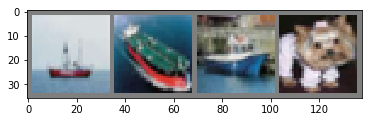

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('{:5s}'.format(classes[labels[j]]) for j in range(4)))

In [5]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[{:d}, {:5d}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1,  2000] loss: 2.197
[1,  4000] loss: 1.829
[1,  6000] loss: 1.657
[1,  8000] loss: 1.588
[1, 10000] loss: 1.532
[1, 12000] loss: 1.480
[2,  2000] loss: 1.379
[2,  4000] loss: 1.380
[2,  6000] loss: 1.348
[2,  8000] loss: 1.324
[2, 10000] loss: 1.336
[2, 12000] loss: 1.285


GroundTruth:  cat   ship  ship  plane


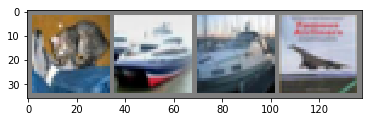

In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('{:5s}'.format(classes[labels[j]]) for j in range(4)))

In [9]:
outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('predicted: ', ' '.join('{:5s}'.format(classes[predicted[j]]) for j in range(4)))

predicted:  cat   car   ship  plane


In [10]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the network on the 10000 test images: {:.0f} %%'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %%


In [11]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
        
for i in range(10):
    print('Accuracy of {:5s} : {:2.0f} %%'.format(classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 69 %%
Accuracy of car   : 67 %%
Accuracy of bird  : 43 %%
Accuracy of cat   : 43 %%
Accuracy of deer  : 45 %%
Accuracy of dog   : 56 %%
Accuracy of frog  : 62 %%
Accuracy of horse : 55 %%
Accuracy of ship  : 70 %%
Accuracy of truck : 51 %%


In [12]:
net2 = Net()
net2.cuda()
optimizer2 = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        
        optimizer2.zero_grad()
        
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer2.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[{:d}, {:5d}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1,  2000] loss: 2.232
[1,  4000] loss: 1.889
[1,  6000] loss: 1.702
[1,  8000] loss: 1.620
[1, 10000] loss: 1.549
[1, 12000] loss: 1.512
[2,  2000] loss: 1.413
[2,  4000] loss: 1.387
[2,  6000] loss: 1.374
[2,  8000] loss: 1.351
[2, 10000] loss: 1.306
[2, 12000] loss: 1.278
